# EDA for students data

## Importing and reading

In [1]:
# Importing usefull libraries
import numpy as np # For numerical tasks
import pandas as pd # For dataframe related tasks

# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For removing annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data

df = pd.read_csv("../data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Analysis

### Missing values identification

In [3]:
# Checking for any missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Checking for duplicate values

In [4]:
# Check for any duplicate values

df.duplicated().sum()

0

### Getting info of all the columns

In [5]:
# Let us see info of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking unique values

In [20]:
# Let us see unique values in each column

# Getting the numerical and non-numerical columns
non_numerical_columns = []
numerical_columns = []

for column in list(df.columns):
    if df[column].dtype == 'object':
        non_numerical_columns.append(column)
    else:
        numerical_columns.append(column)

print(f"These are the numerical columns:\n {numerical_columns}")
print(f"These are the non-numerical columns:\n {non_numerical_columns}")
print("******************************************")

# Itterating through the non-numerical columns and getting all the unique values
for column in non_numerical_columns:
    print(f"The {column} has {len(df[column].unique())} number of columns \n \
        These are: {df[column].unique()}")

These are the numerical columns:
 ['math_score', 'reading_score', 'writing_score']
These are the non-numerical columns:
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
******************************************
The gender has 2 number of columns 
         These are: ['female' 'male']
The race_ethnicity has 5 number of columns 
         These are: ['group B' 'group C' 'group A' 'group D' 'group E']
The parental_level_of_education has 6 number of columns 
         These are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The lunch has 2 number of columns 
         These are: ['standard' 'free/reduced']
The test_preparation_course has 2 number of columns 
         These are: ['none' 'completed']


### Getting statstical information

In [17]:
# Let us see the statstics of our data

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Feature engineering ( Adding new columns)

In [21]:
# Add an average score column and total score column

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

# Checking the data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Checking on which field students succeed

In [27]:
# Let us see numbers of students that got full mark

for course in numerical_columns:
    print(f"{df[df[course] == 100][course].count()}\
    students got full mark in {course}")

7    students got full mark in math_score
17    students got full mark in reading_score
14    students got full mark in writing_score


In [28]:
# Let us see students that got less than 50 in each subject

for course in numerical_columns:
    print(f"{df[df[course] <= 50][course].count()}\
    students got full mark in {course}")

150    students got full mark in math_score
97    students got full mark in reading_score
124    students got full mark in writing_score


> From the above results we can see that students got good marks in reading

## Data Visualization

### Historgram Visualization

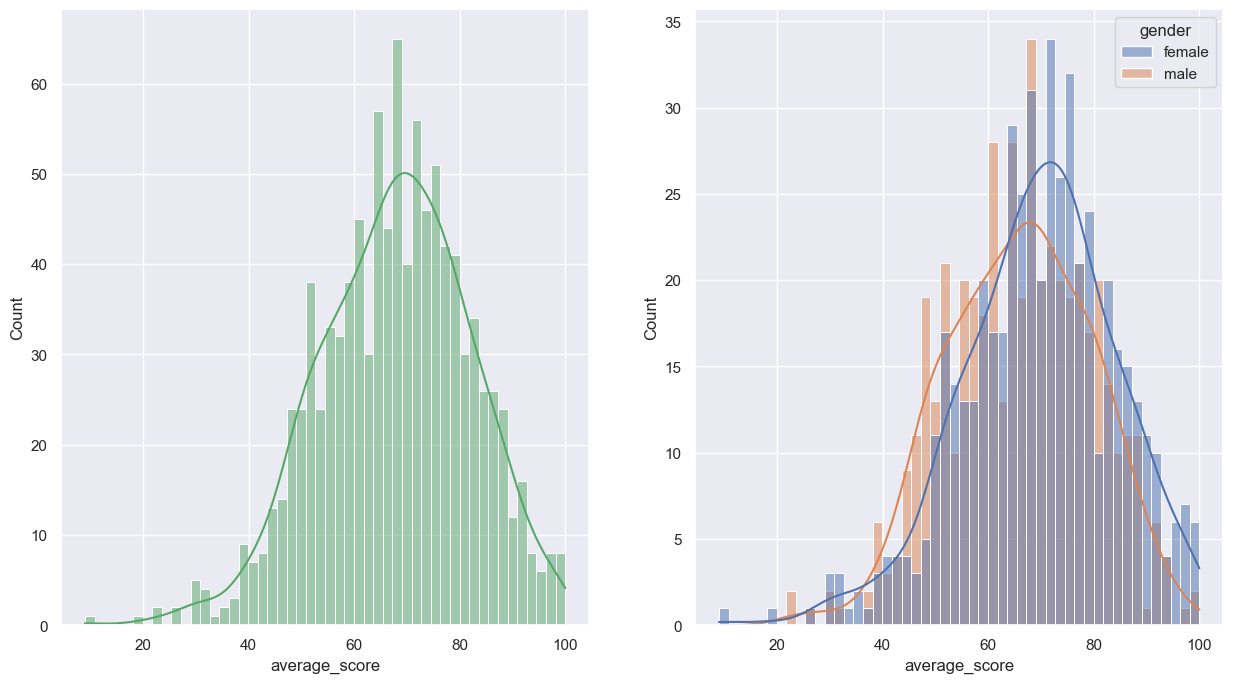

In [31]:
# Let us visualize the distribution of average scores

sns.set() # To have nice grid

fig , ax = plt.subplots(1,2,figsize=(15,8))

plt.subplot(121)

sns.histplot(
    data = df,
    x = 'average_score',
    bins = 50,
    kde = True,
    color = 'g'
    )

plt.subplot(122)

sns.histplot(
    data = df,
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = 'gender'
    )

plt.savefig("../charts/distribution_plot_of_average_score.jpg")
plt.show()

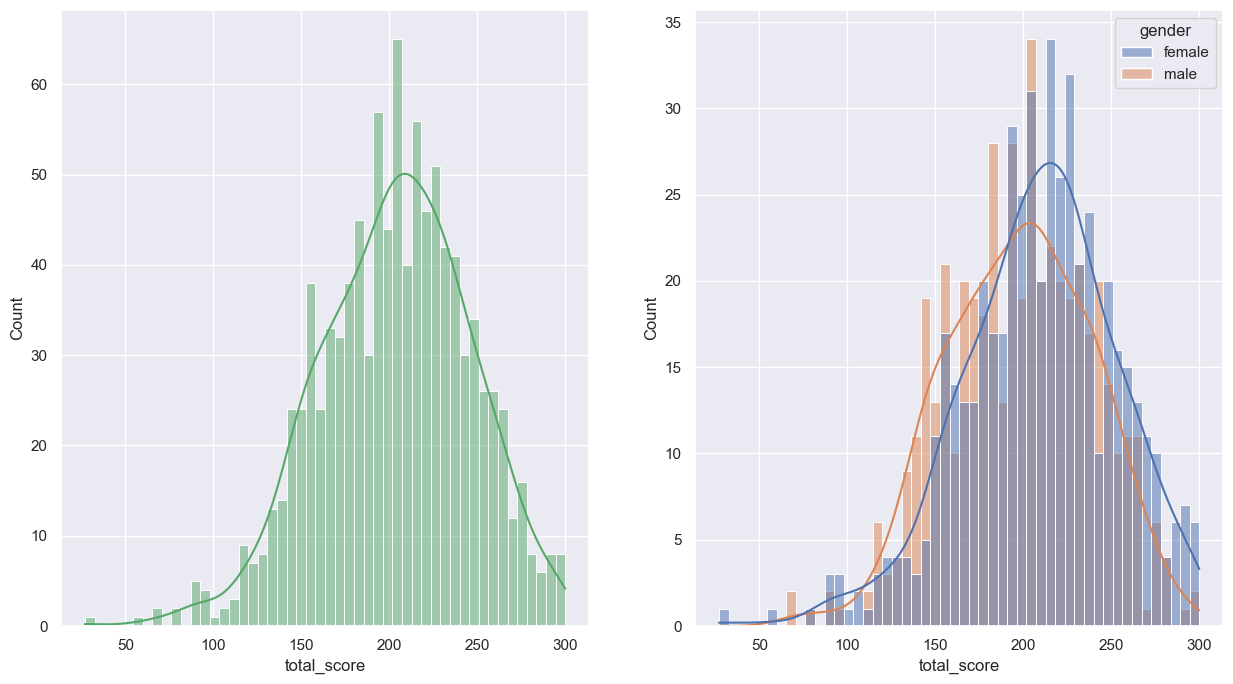

In [33]:
# Let us visualize the distribution of total scores

fig , ax = plt.subplots(1,2,figsize=(15,8))

plt.subplot(121)

ax = sns.histplot(
    data = df,
    x = 'total_score',
    bins = 50,
    kde = True,
    color = 'g'
    )

plt.subplot(122)

ax = sns.histplot(
    data = df,
    x = 'total_score',
    bins = 50,
    kde = True,
    hue = 'gender'
    )

plt.savefig("../charts/distribution_plot_of_total_score.jpg")
plt.show()

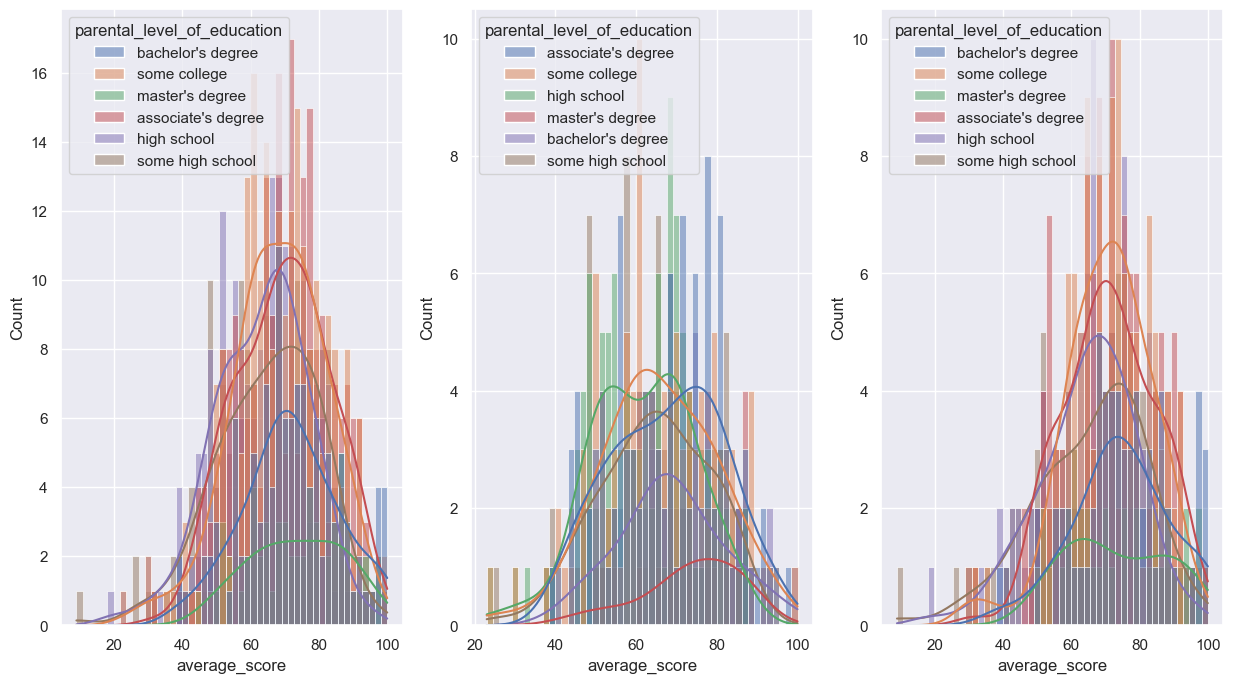

In [36]:
# Let us visualize the distribution of average scores

sns.set() # To have nice grid

fig , ax = plt.subplots(1,3,figsize=(15,8))

plt.subplot(131)

# Plotting the average scores of total students by their parental level of education
ax = sns.histplot(
    data = df,
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "parental_level_of_education"
    )

plt.subplot(132)

# Plotting the average scores of male students by their parental level of education
ax = sns.histplot(
    data = df[df['gender']=="male"],
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "parental_level_of_education"
    )

plt.subplot(133)

# Plotting the average scores of female students by their parental level of education
ax = sns.histplot(
    data = df[df['gender']=="female"],
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "parental_level_of_education"
    )

plt.savefig("../charts/distribution_plot_of_average_score_by_parental_education.jpg")
plt.show()

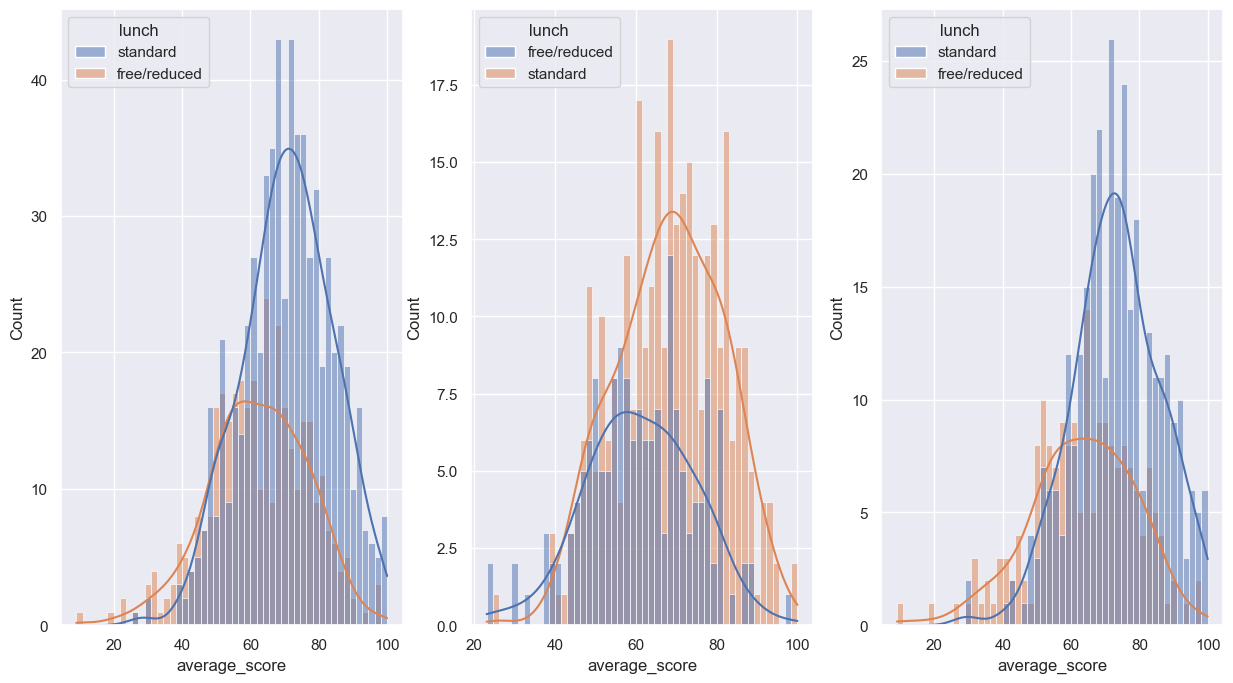

In [37]:
# Let us visualize the distribution of average scores

sns.set() # To have nice grid

fig , ax = plt.subplots(1,3,figsize=(15,8))

plt.subplot(131)

# Plotting the average scores of total students by their lunch status
ax = sns.histplot(
    data = df,
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "lunch"
    )

plt.subplot(132)

# Plotting the average scores of male students by their lunch status
ax = sns.histplot(
    data = df[df['gender']=="male"],
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "lunch"
    )

plt.subplot(133)

# Plotting the average scores of female students by their lunch status
ax = sns.histplot(
    data = df[df['gender']=="female"],
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "lunch"
    )

plt.savefig("../charts/distribution_plot_of_average_score_by_lunch.jpg")
plt.show()

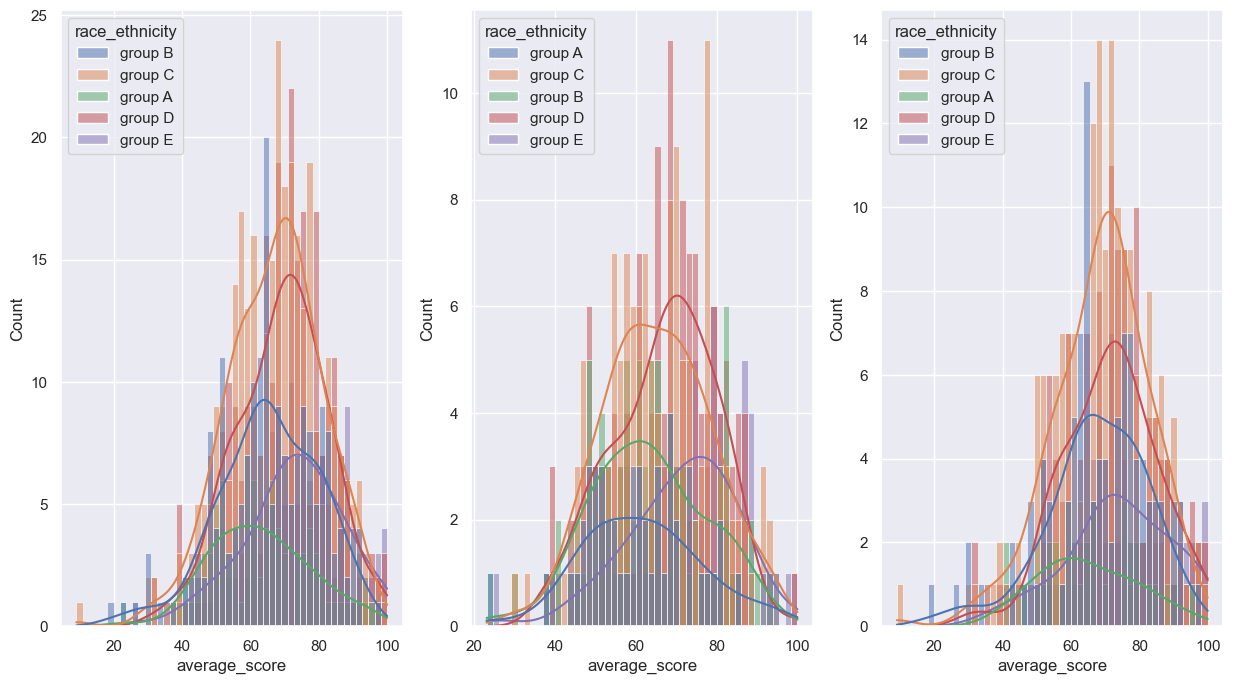

In [38]:
# Let us visualize the distribution of average scores

sns.set() # To have nice grid

fig , ax = plt.subplots(1,3,figsize=(15,8))

plt.subplot(131)

# Plotting the average scores of total students by their race
ax = sns.histplot(
    data = df,
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "race_ethnicity"
    )

plt.subplot(132)

# Plotting the average scores of male students by their race
ax = sns.histplot(
    data = df[df['gender']=="male"],
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "race_ethnicity"
    )

plt.subplot(133)

# Plotting the average scores of female students by their race
ax = sns.histplot(
    data = df[df['gender']=="female"],
    x = 'average_score',
    bins = 50,
    kde = True,
    hue = "race_ethnicity"
    )

plt.savefig("../charts/distribution_plot_of_average_score_by_race.jpg")
plt.show()

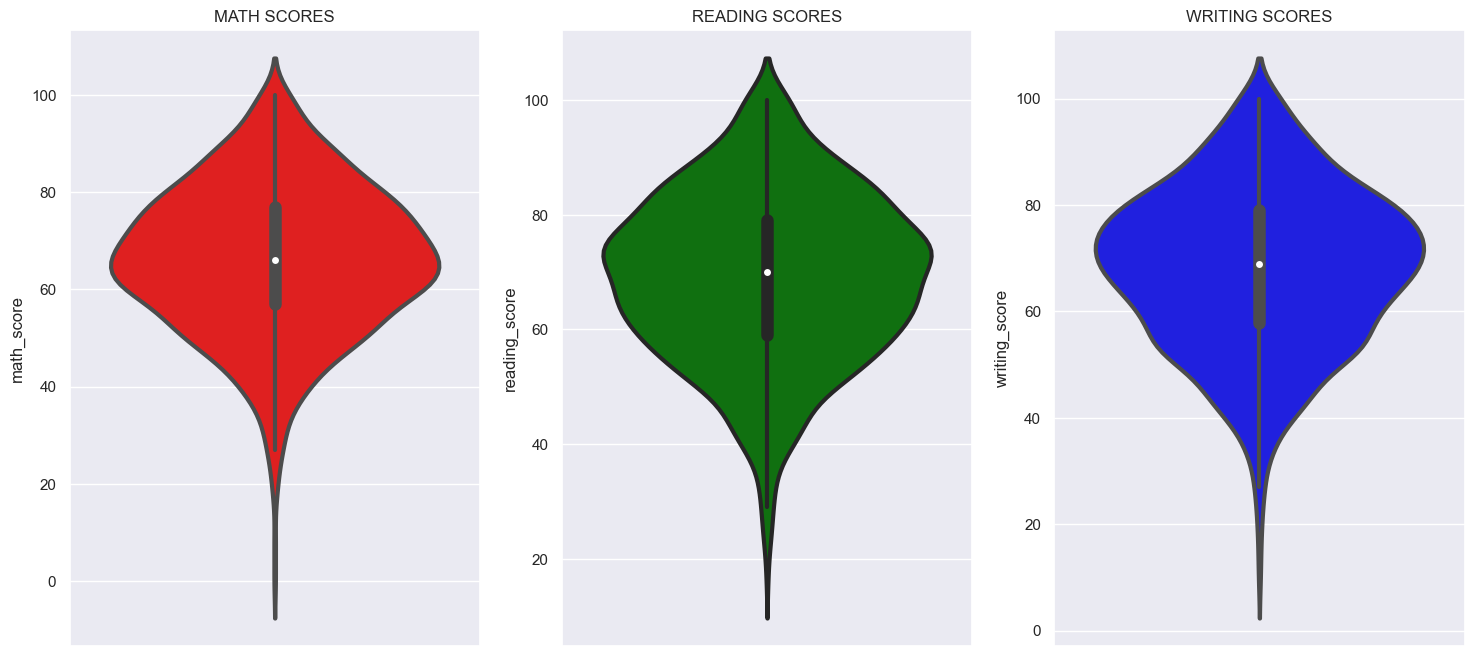

In [41]:
# Plotting highscores in each subject

fig , ax = plt.subplots(1,3,figsize=(18,8))

plt.subplot(1, 3, 1)

# Maths score plotting
plt.title('MATH SCORES')
sns.violinplot(
    y='math_score',
    data=df,
    color='red',
    linewidth=3
    )

plt.subplot(1, 3, 2)

# Reading score plotting
plt.title('READING SCORES')
sns.violinplot(
    y='reading_score',
    data=df,
    color='green',
    linewidth=3
    )

plt.subplot(1, 3, 3)

# Writing score plotting
plt.title('WRITING SCORES')
sns.violinplot(
    y='writing_score',
    data=df,
    color='blue',
    linewidth=3
    )

plt.savefig("../charts/violine_plot_of_subject_scores.jpg")
plt.show()